In [66]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

import torch.nn.functional as F

import random
import math
import joblib

## Data for GAN training

In [2]:
df_gan_real = joblib.load('../inputs/pre-processed/df_gan_real.pkl')

In [3]:
df_gan_real

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,0.880689,0.883310,0.880682,0.885696,0.911670,0.911528,0.000000,0.286272,0.300062,0.300035,0.681089,0.679748,0.900163,0.895531,0.0
1,0.881517,0.884084,0.881510,0.886472,0.912527,0.912327,0.286213,0.286228,0.299981,0.300048,0.681729,0.680344,0.900614,0.895979,0.0
2,0.880936,0.883653,0.880929,0.886040,0.911926,0.911882,0.286257,0.286242,0.300075,0.300075,0.681280,0.680012,0.900163,0.895979,0.0
3,0.963877,0.967061,0.963869,0.969673,0.997784,0.997954,0.273708,0.273602,0.285997,0.285829,0.745423,0.744198,0.216735,0.216961,0.0
4,0.882956,0.885347,0.882949,0.887738,0.914017,0.913630,0.286184,0.286199,0.299955,0.299968,0.682842,0.681316,0.901065,0.896428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.883036,0.895666,0.870898,0.887070,0.287619,0.277391,0.286052,0.290235,0.301354,0.294628,0.912764,0.918396,0.887348,0.889282,1.0
9995,0.884062,0.878863,0.858351,0.873352,0.354632,0.346057,0.286374,0.280552,0.298908,0.299375,0.912205,0.858235,0.851455,0.793433,1.0
9996,0.918889,0.897820,0.921813,0.923951,0.355926,0.349120,0.286013,0.283202,0.298104,0.305716,0.888643,0.930148,0.829160,0.875546,1.0
9997,0.883785,0.883423,0.892194,0.882118,0.348669,0.353311,0.291266,0.283867,0.303656,0.303889,0.920046,0.913415,0.877215,0.855864,1.0


In [4]:
df_gan_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9952 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_Z0_before      9952 non-null   float64
 1   P_Z0_after       9952 non-null   float64
 2   P_Z1_before      9952 non-null   float64
 3   P_Z1_after       9952 non-null   float64
 4   P_WH_before      9952 non-null   float64
 5   P_WH_after       9952 non-null   float64
 6   T_Z0_before      9952 non-null   float64
 7   T_Z0_after       9952 non-null   float64
 8   T_Z1_before      9952 non-null   float64
 9   T_Z1_after       9952 non-null   float64
 10  P_bottom_before  9952 non-null   float64
 11  P_bottom_after   9952 non-null   float64
 12  T_WH_before      9952 non-null   float64
 13  T_WH_after       9952 non-null   float64
 14  failure          9952 non-null   float64
dtypes: float64(15)
memory usage: 1.2 MB


In [5]:
df_gan_real.describe()

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
count,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000,9952.000000
mean,0.885386,0.888107,0.885516,0.890417,0.621929,0.621826,0.282035,0.282245,0.295613,0.295404,0.788410,0.789576,0.824172,0.819970,0.497588
std,0.106734,0.109333,0.106761,0.109445,0.305231,0.305790,0.032427,0.031461,0.032096,0.034295,0.139919,0.142756,0.186260,0.186731,0.500019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.878326,0.881000,0.878313,0.883193,0.349702,0.349725,0.282908,0.282869,0.296197,0.296473,0.682305,0.680970,0.849536,0.848136,0.000000
50%,0.883861,0.886560,0.883887,0.888841,0.657162,0.656717,0.286199,0.286199,0.299888,0.299900,0.746957,0.745605,0.897005,0.892840,0.000000
75%,0.910181,0.916668,0.910383,0.919934,0.913525,0.913426,0.287518,0.287532,0.300275,0.300302,0.914168,0.914058,0.901065,0.896876,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Converting pandas dataframe to pytorch tensor
df_real_tensor = torch.tensor(df_gan_real.values)

In [7]:
df_real_tensor

tensor([[0.8807, 0.8833, 0.8807,  ..., 0.9002, 0.8955, 0.0000],
        [0.8815, 0.8841, 0.8815,  ..., 0.9006, 0.8960, 0.0000],
        [0.8809, 0.8837, 0.8809,  ..., 0.9002, 0.8960, 0.0000],
        ...,
        [0.9189, 0.8978, 0.9218,  ..., 0.8292, 0.8755, 1.0000],
        [0.8838, 0.8834, 0.8922,  ..., 0.8772, 0.8559, 1.0000],
        [0.9785, 0.9743, 0.9552,  ..., 0.9416, 0.9185, 1.0000]],
       dtype=torch.float64)

In [8]:
type(df_real_tensor)

torch.Tensor

## Discriminator

In [9]:
class Discriminator_ndim(nn.Module):
    def __init__(self, ndim, hidden):
        super(Discriminator_ndim, self).__init__()
        self.fc1 = nn.Linear(ndim, hidden)
#         self.fc2 = nn.Linear(hidden, hidden)
        self.fc3 = nn.Linear(hidden,1)

    def forward(self,x):
        x = self.fc1(x)
        x = F.leaky_relu(x)
#         x = self.fc2(x)
#         x = F.leaky_relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [10]:
discriminator = Discriminator_ndim(15, 25)
# test a discriminator with a simple input - sanity check
x_data_test = torch.rand(15)
discriminator(x_data_test)

tensor([0.4849], grad_fn=<SigmoidBackward0>)

In [11]:
def sample_real_data(real_tensor, N_samples):
    
    idx = np.random.randint(0, real_tensor.shape[0], N_samples)
    sample = real_tensor[idx, :].float()
    
    y_real = torch.ones((N_samples,1))
    
    return sample, y_real

In [12]:
def generate_dummy_fake_ndim(n, ndim):
    
    signals = []
    y_fake = torch.zeros((n,1))
    
    for dim in range(ndim):
        
        x_dim = torch.rand(n)
        x_dim = x_dim.view(n, 1)
        signals.append(x_dim)
    
    return torch.hstack(signals), y_fake

In [13]:
fake = generate_dummy_fake_ndim(10, 15)

In [14]:
fake[0].dtype

torch.float32

In [15]:
real = sample_real_data(df_real_tensor, 10)

In [16]:
real[0].dtype

torch.float32

In [17]:
real[1].dtype

torch.float32

### Verifying if the discriminator is able to distinguish real data from completely random data

In [18]:
epochs = 1000
n = 100
n_dim = 15
hidden = 10

discriminator = Discriminator_ndim(n_dim, hidden)
optimizer = torch.optim.Adam(discriminator.parameters(), lr = 0.001) 
criterion = torch.nn.BCELoss()

x_data, y_data = sample_real_data(df_real_tensor, n)
x_fake, y_fake = generate_dummy_fake_ndim(n, n_dim)

x_all = torch.vstack((x_data, x_fake))
y_all = torch.vstack((y_data, y_fake))
all_loss = []
for i in range(epochs):
    y_hat = discriminator(x_all)
    loss = criterion(y_hat, y_all)
    all_loss.append(loss.item())

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

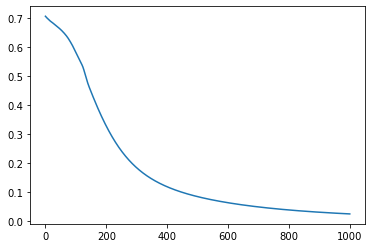

In [19]:
plt.plot(all_loss)

## Generator

In [20]:
class Generator_ndim(nn.Module):
    def __init__(self, n_dim, hidden):
        super(Generator_ndim, self).__init__()

        self.fc1 = nn.Linear(5, hidden)
#         self.fc2 = nn.Linear(hidden, hidden)
        self.fc3 = nn.Linear(hidden, n_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
#         x = self.fc2(x)
#         x = F.relu(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        # note that here we are not adding any activation functions
        # since we assume the linear output as the values can be negative as well
        # in other words this activation function here is just an "identity function" f(x)=x
        return x

In [21]:
generator = Generator_ndim(6, 6)
test_generator = generator(torch.rand(5))
print(test_generator)

tensor([0.5106, 0.5460, 0.6179, 0.4276, 0.5661, 0.4958],
       grad_fn=<SigmoidBackward0>)


In [22]:
generator = Generator_ndim(4, 6)
test_generator = generator(torch.rand(5))
print(test_generator)

tensor([0.5262, 0.5748, 0.5544, 0.4783], grad_fn=<SigmoidBackward0>)


In [23]:
def generate_latent_points(n, latent_dim=5):
    # here we will assume that in the z-space 
    # or latent space we have 5 dimensional random vector 
    z = torch.rand(n*latent_dim)
    return z.view((n,latent_dim))

a = generate_latent_points(10)
print(a)

tensor([[0.7041, 0.3327, 0.1881, 0.1292, 0.5493],
        [0.6638, 0.5910, 0.2452, 0.3487, 0.8017],
        [0.1572, 0.9360, 0.8804, 0.5400, 0.2791],
        [0.5715, 0.9213, 0.1137, 0.1300, 0.6250],
        [0.8289, 0.6775, 0.4101, 0.8716, 0.0391],
        [0.9690, 0.8243, 0.3636, 0.6152, 0.3009],
        [0.2690, 0.9213, 0.9646, 0.1575, 0.1982],
        [0.2792, 0.1300, 0.6132, 0.6974, 0.2858],
        [0.9972, 0.2078, 0.1881, 0.0172, 0.3441],
        [0.2528, 0.6310, 0.1638, 0.0132, 0.8173]])


In [24]:
def generate_fake_samples(generator, n):
    z = generate_latent_points(n)
    fake_data = generator(z)
    return fake_data

## GAN training

In [46]:
training_steps = 100_000    
n_dim = 15
hidden_g = 35
hidden_d = 35

# Models
generator =     Generator_ndim(n_dim, hidden_g)
discriminator = Discriminator_ndim(n_dim, hidden_d)

# Optimizers
generator_optimizer     = torch.optim.Adam(generator.parameters(),     lr=0.001)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

# loss
loss = nn.BCELoss()
# loss = nn.MSELoss()

discriminator_losses = []
generator_losses = []

N = 128

for i in tqdm(range(training_steps)):
    # zero the gradients on each iteration
    generator_optimizer.zero_grad()
#    if i%5000 ==0:
#        print(f"{i} \n")

    # Create a fake data with a generator
    fake_data = generate_fake_samples(generator, N)

    # here we define the INVERSE labels for fake data
    fake_data_label = torch.ones(N,1)

    # Generate examples of real data
    real_data, real_data_label = sample_real_data(df_real_tensor, N)
    
    # Train the generator
    # We invert the labels here and don't train the discriminator because we want the generator
    # to make things the discriminator classifies as true.
    generator_discriminator_out = discriminator(fake_data)
    generator_loss = loss(generator_discriminator_out, fake_data_label)
    generator_loss.backward()
    generator_optimizer.step()
    generator_losses.append(generator_loss.item())


    # Train the discriminator on the true/generated data
    discriminator_optimizer.zero_grad()
    true_discriminator_out = discriminator(real_data)
    true_discriminator_loss = loss(true_discriminator_out, real_data_label)

    # here a fake_data is passed with a gradient turned off
    # see our post about <a href="https://datahacker.rs/004-computational-graph-and-autograd-with-pytorch/#Automatic-differentiation-module-in-PyTorch---Autograd">AUTOGRAD</a>
    generator_discriminator_out = discriminator(fake_data.detach())
    generator_discriminator_loss = loss(generator_discriminator_out, torch.zeros(N,1))
    discriminator_loss = (true_discriminator_loss + generator_discriminator_loss) / 2
    discriminator_loss.backward()
    discriminator_optimizer.step()
    discriminator_losses.append(discriminator_loss.item())
    
#     mean_loss = (generator_loss.item() + discriminator_loss.item()) / 2
    
#     if (i%1000) == 0:
#         print(i)
# #         print(mean_loss)
#         print(f'Generator loss: {generator_loss.item()}')
#         print(f'Discriminator loss: {discriminator_loss.item()}')
#         print('---')
    
    # early stopping
    if discriminator_loss.item() < 0.3 and generator_loss.item() < 0.4 and i > 1_000 and i > 20_000:
        print(f'Early stop!! Generator loss: {generator_loss.item()} / Discriminator loss: {discriminator_loss.item()}')
        break

100%|█████████████████████████████████| 100000/100000 [01:27<00:00, 1139.92it/s]


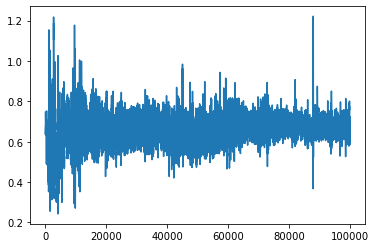

In [47]:
plt.plot(discriminator_losses)

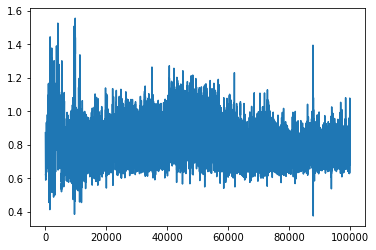

In [48]:
plt.plot(generator_losses)

## Checking pairwise scatterplots

In [49]:
df_gan_real.head()

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,0.880689,0.883310,0.880682,0.885696,0.911670,0.911528,0.000000,0.286272,0.300062,0.300035,0.681089,0.679748,0.900163,0.895531,0.0
1,0.881517,0.884084,0.881510,0.886472,0.912527,0.912327,0.286213,0.286228,0.299981,0.300048,0.681729,0.680344,0.900614,0.895979,0.0
2,0.880936,0.883653,0.880929,0.886040,0.911926,0.911882,0.286257,0.286242,0.300075,0.300075,0.681280,0.680012,0.900163,0.895979,0.0
3,0.963877,0.967061,0.963869,0.969673,0.997784,0.997954,0.273708,0.273602,0.285997,0.285829,0.745423,0.744198,0.216735,0.216961,0.0
4,0.882956,0.885347,0.882949,0.887738,0.914017,0.913630,0.286184,0.286199,0.299955,0.299968,0.682842,0.681316,0.901065,0.896428,0.0


In [50]:
fake_data[:3, :]

tensor([[0.9424, 0.9814, 0.9662, 0.9623, 0.9656, 0.9854, 0.3229, 0.3011, 0.3363,
         0.3017, 0.7345, 0.6864, 0.8641, 0.8091, 0.0000],
        [0.9365, 0.9806, 0.9609, 0.9584, 0.9718, 0.9885, 0.3441, 0.2976, 0.3299,
         0.3058, 0.7405, 0.6802, 0.7778, 0.7421, 0.0000],
        [0.9329, 0.9767, 0.9514, 0.9518, 0.9689, 0.9874, 0.3418, 0.2974, 0.3284,
         0.3060, 0.7364, 0.6769, 0.7621, 0.7342, 0.0000]],
       grad_fn=<SliceBackward0>)

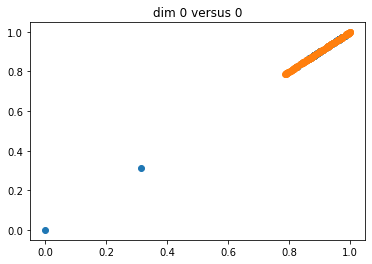

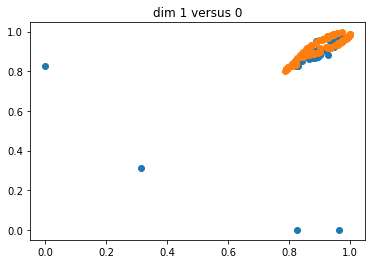

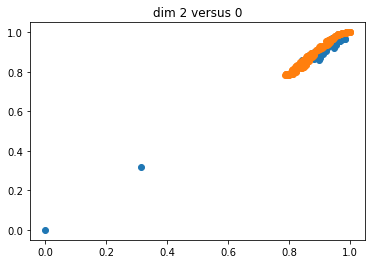

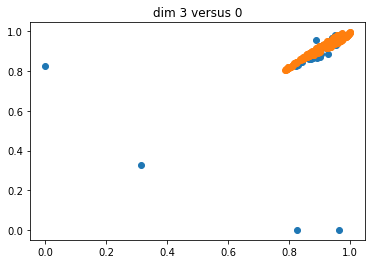

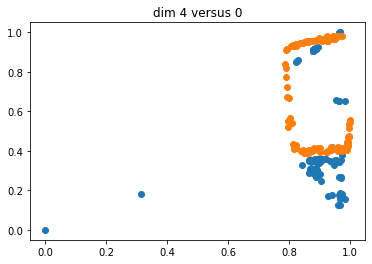

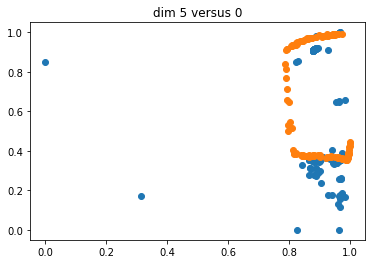

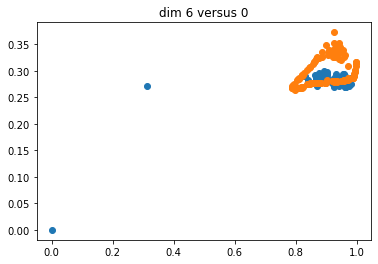

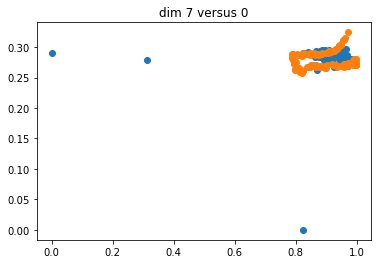

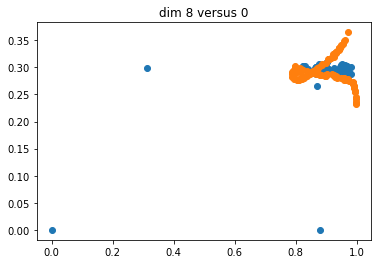

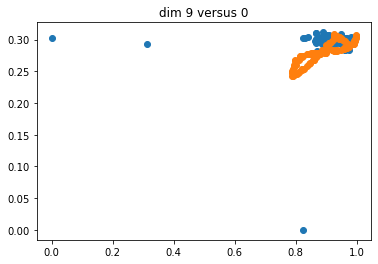

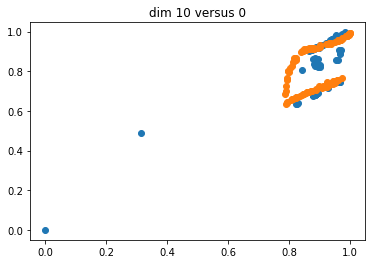

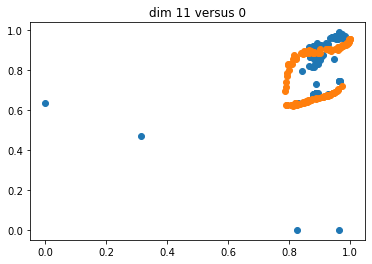

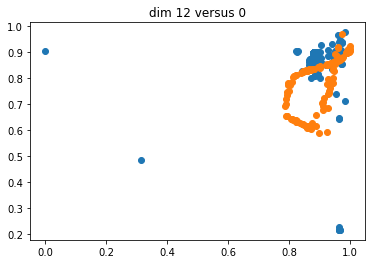

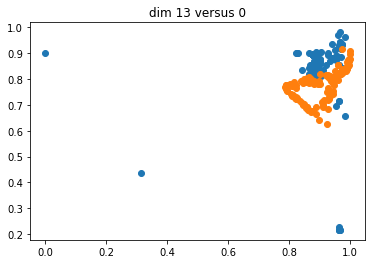

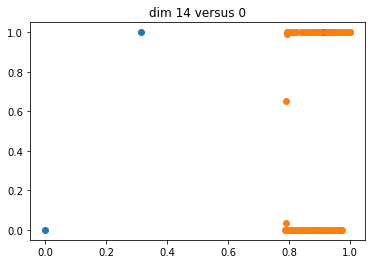

In [56]:
## Checking for P_Z0_before variable (column 0)
for k in range(n_dim):
    plt.scatter(real_data[:,0].detach().numpy(), real_data[:,k].detach().numpy())
    plt.scatter(fake_data[:,0].detach().numpy(), fake_data[:,k].detach().numpy())
    plt.title(f'dim {k} versus 0')
    plt.show()

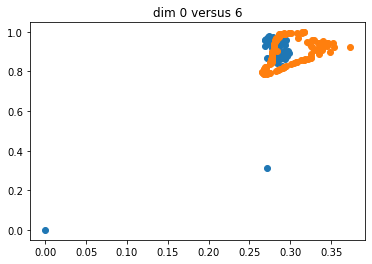

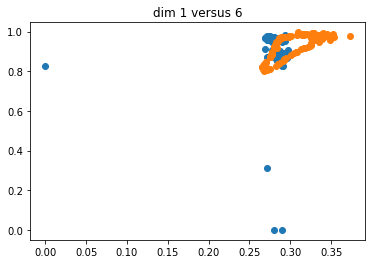

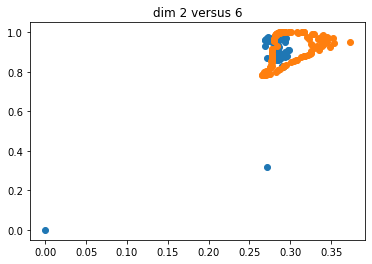

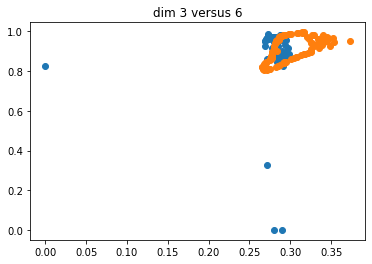

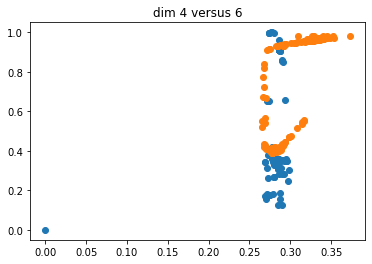

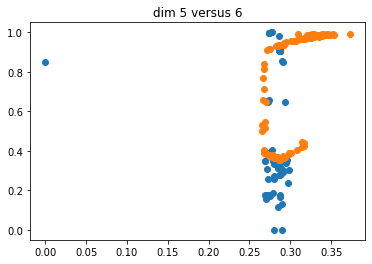

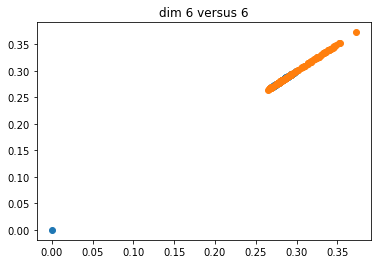

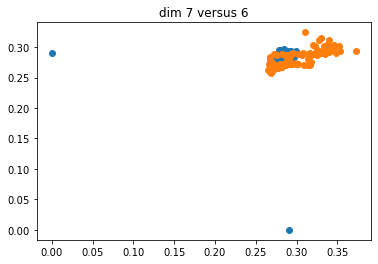

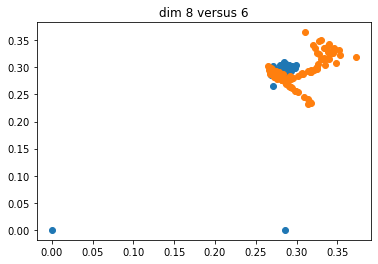

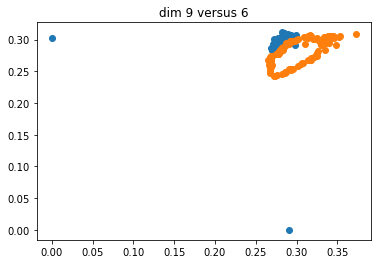

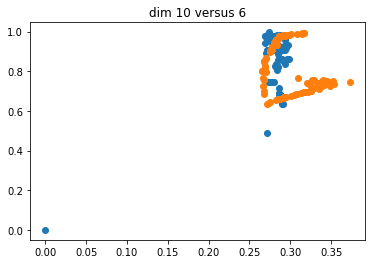

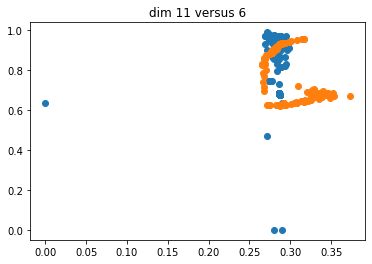

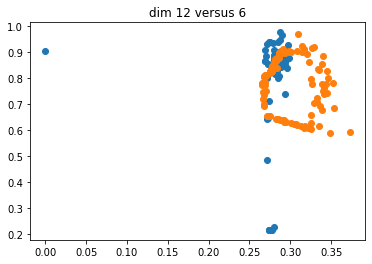

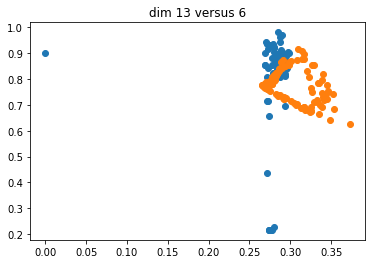

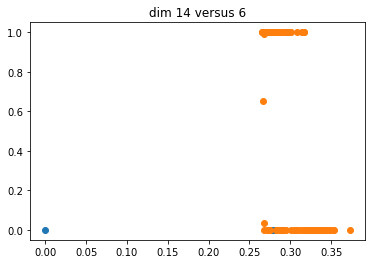

In [59]:
## Checking for T_Z0_before variable (column 6)
for k in range(n_dim):
    plt.scatter(real_data[:,6].detach().numpy(), real_data[:,k].detach().numpy())
    plt.scatter(fake_data[:,6].detach().numpy(), fake_data[:,k].detach().numpy())
    plt.title(f'dim {k} versus 6')
    plt.show()

## Creating a synthetic dataset generated by GAN for comparison

In [60]:
generator

Generator_ndim(
  (fc1): Linear(in_features=5, out_features=35, bias=True)
  (fc3): Linear(in_features=35, out_features=15, bias=True)
)

In [61]:
synthetic_data = generate_fake_samples(generator, 10_000)

In [62]:
synthetic_data.shape

torch.Size([10000, 15])

In [63]:
synthetic_data

tensor([[9.1771e-01, 9.2225e-01, 9.5493e-01,  ..., 8.4287e-01, 8.2477e-01,
         1.0000e+00],
        [9.0051e-01, 9.0963e-01, 9.2970e-01,  ..., 8.4169e-01, 8.1440e-01,
         1.0000e+00],
        [9.3105e-01, 9.7710e-01, 9.5298e-01,  ..., 7.4067e-01, 7.1943e-01,
         0.0000e+00],
        ...,
        [9.2100e-01, 9.1213e-01, 9.5211e-01,  ..., 8.5128e-01, 8.0116e-01,
         1.0000e+00],
        [9.9194e-01, 9.7334e-01, 9.9957e-01,  ..., 9.0162e-01, 8.5549e-01,
         1.0000e+00],
        [8.3430e-01, 8.7915e-01, 8.4511e-01,  ..., 6.3025e-01, 7.1361e-01,
         3.1096e-17]], grad_fn=<SigmoidBackward0>)

In [74]:
synth_array = synthetic_data.detach().numpy()
synth_array

array([[9.1771036e-01, 9.2225242e-01, 9.5492548e-01, ..., 8.4287119e-01,
        8.2476687e-01, 1.0000000e+00],
       [9.0050620e-01, 9.0962648e-01, 9.2969930e-01, ..., 8.4169376e-01,
        8.1440037e-01, 1.0000000e+00],
       [9.3104547e-01, 9.7710425e-01, 9.5297962e-01, ..., 7.4066859e-01,
        7.1943426e-01, 0.0000000e+00],
       ...,
       [9.2099750e-01, 9.1213262e-01, 9.5211238e-01, ..., 8.5128367e-01,
        8.0115980e-01, 1.0000000e+00],
       [9.9193984e-01, 9.7334063e-01, 9.9957019e-01, ..., 9.0162033e-01,
        8.5549068e-01, 1.0000000e+00],
       [8.3429652e-01, 8.7914509e-01, 8.4510571e-01, ..., 6.3025355e-01,
        7.1361339e-01, 3.1096346e-17]], dtype=float32)

In [73]:
encoders = joblib.load('../inputs/pre-processed/dic_encoders_gan.pkl')
encoders

{'P_Z0_before': MinMaxScaler(),
 'P_Z0_after': MinMaxScaler(),
 'P_Z1_before': MinMaxScaler(),
 'P_Z1_after': MinMaxScaler(),
 'P_WH_before': MinMaxScaler(),
 'P_WH_after': MinMaxScaler(),
 'T_Z0_before': MinMaxScaler(),
 'T_Z0_after': MinMaxScaler(),
 'T_Z1_before': MinMaxScaler(),
 'T_Z1_after': MinMaxScaler(),
 'P_bottom_before': MinMaxScaler(),
 'P_bottom_after': MinMaxScaler(),
 'T_WH_before': MinMaxScaler(),
 'T_WH_after': MinMaxScaler(),
 'failure': MinMaxScaler()}

In [91]:
dic_gan_generated = {}

for k, col_enc in enumerate(encoders.items()):
    dic_gan_generated[col_enc[0]] = col_enc[1].inverse_transform(synth_array[:, k].reshape(-1, 1)).squeeze()

In [92]:
dic_gan_generated

{'P_Z0_before': array([809.62317, 798.19464, 818.4815 , ..., 811.8068 , 858.93286,
        754.21246], dtype=float32),
 'P_Z0_after': array([810.7316 , 802.37054, 847.05554, ..., 804.03015, 844.5632 ,
        782.18524], dtype=float32),
 'P_Z1_before': array([774.3499 , 757.5923 , 773.0573 , ..., 772.4812 , 804.0071 ,
        701.39746], dtype=float32),
 'P_Z1_after': array([743.2348 , 735.5474 , 769.04803, ..., 743.30994, 789.30084,
        706.53723], dtype=float32),
 'P_WH_before': array([254.9936 , 252.06357, 623.0879 , ..., 263.01028, 287.55106,
        603.9366 ], dtype=float32),
 'P_WH_after': array([235.41829, 236.     , 633.99585, ..., 238.61511, 236.24915,
        610.0433 ], dtype=float32),
 'T_Z0_before': array([ 87.14267,  85.65962, 106.32862, ...,  85.60032,  89.57726,
         92.19143], dtype=float32),
 'T_Z0_after': array([83.61783 , 83.670715, 91.06964 , ..., 82.7603  , 83.86959 ,
        88.57717 ], dtype=float32),
 'T_Z1_before': array([84.81369 , 85.46272 , 96.5411

In [93]:
df_gan_generated = pd.DataFrame(dic_gan_generated)
df_gan_generated

,P_Z0_before,P_Z0_after,P_Z1_before,P_Z1_after,P_WH_before,P_WH_after,T_Z0_before,T_Z0_after,T_Z1_before,T_Z1_after,P_bottom_before,P_bottom_after,T_WH_before,T_WH_after,failure
0,809.623169,810.731628,774.349915,743.234802,254.993607,235.418289,87.142670,83.617828,84.813690,83.927757,804.413025,784.191040,69.659775,68.144562,1.000000e+00
1,798.194641,802.370544,757.592285,735.547424,252.063568,236.000000,85.659622,83.670715,85.462723,83.123856,798.249573,778.745850,69.535324,67.042488,1.000000e+00
2,818.481506,847.055542,773.057312,769.048035,623.087891,633.995850,106.328621,91.069641,96.541176,90.217949,633.204407,581.719055,58.857521,56.946575,0.000000e+00
3,732.812927,744.685852,660.502197,681.042969,406.143585,391.753632,83.088882,84.033012,85.716240,77.493233,692.733215,699.941528,60.912800,62.955395,9.999963e-01
4,853.963745,837.576050,803.128845,781.672302,268.001526,229.451889,87.378784,83.756706,80.675461,86.298561,836.298523,797.531006,75.101418,69.453583,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,844.962524,829.377319,800.394714,772.007629,261.395172,230.846939,86.867081,83.894569,82.335457,85.304985,827.716858,793.296570,73.391495,69.020332,1.000000e+00
9996,859.043335,845.364746,804.045593,790.442383,301.439362,245.954224,91.225800,83.944077,76.727547,88.188782,844.699036,812.933044,75.237419,72.528130,1.000000e+00
9997,811.806824,804.030151,772.481201,743.309937,263.010284,238.615112,85.600319,82.760300,83.991386,83.100784,802.328247,773.420959,70.548927,65.634872,1.000000e+00
9998,858.932861,844.563171,804.007080,789.300842,287.551056,236.249146,89.577263,83.869591,77.850677,87.740730,843.718384,808.251892,75.869232,71.410835,1.000000e+00


In [94]:
df_gan_generated['failure'] = df_gan_generated['failure'].round(0)

In [95]:
df_gan_generated['failure'].value_counts()

1.0    5475
0.0    4525
Name: failure, dtype: int64

In [96]:
df_gan_generated.to_csv('../outputs/gan_synthetic_failure_data.csv')

In [97]:
joblib.dump(df_gan_generated, '../inputs/df_gan_generated.pkl')

['../inputs/df_gan_generated.pkl']